# breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, \
                            confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve,\
                            PrecisionRecallDisplay, roc_curve, RocCurveDisplay, \
                            average_precision_score, roc_auc_score
import matplotlib.pyplot as plt


In [5]:
# data load, 나누기
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                   random_state=0)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [7]:
# y class 분포
np.unique(y, return_counts=True)
np.unique(y, return_counts=True)[1]/y.size

array([0.37258348, 0.62741652])

In [9]:
# 모델 생성, 학습
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [17]:
# 추론

# tree
pred_train_tree = tree.predict(X_train)   # 최종 class를 예측
pred_test_tree = tree.predict(X_test)
pred_train_prob_tree = tree.predict_proba(X_train)[:, 1]  # positive(1)의 확률 예측
pred_test_prob_tree = tree.predict_proba(X_test)[:, 1]

#rf
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)
pred_train_prob_rf = rf.predict_proba(X_train)[:, 1]
pred_test_prob_rf = rf.predict_proba(X_test)[:, 1]

In [14]:
def print_metrics(y, pred, pred_prob, title):
    """
    분류 평가 출력 함수
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 예측 class
        pred_prob: ndarray - 예측 양성 확률
        title: str - 제목
    """
    print(title)
    print('정확도(accuracy): ', accuracy_score(y, pred))
    print('재현율(recall): ', recall_score(y, pred))
    print('정밀도(precision): ', precision_score(y, pred))
    print('F1 점수(F1 score): ', f1_score(y, pred))
    
    print('AP 점수: ', average_precision_score(y, pred_prob))
    print('AUC 점수: ', roc_auc_score(y, pred_prob))

In [15]:
# Tree - Train
print_metrics(y_train, pred_train_tree, pred_train_prob_tree, "DecisionTree Train set")

DecisionTree Train set
정확도(accuracy):  0.9736263736263736
재현율(recall):  0.9964912280701754
정밀도(precision):  0.9627118644067797
F1 점수(F1 score):  0.9793103448275863
AP 점수:  0.9842102478389377
AUC 점수:  0.9863261093911249


In [16]:
# Tree - Test
print_metrics(y_test, pred_test_tree, pred_test_prob_tree, "DecisionTree Test set")

DecisionTree Test set
정확도(accuracy):  0.9210526315789473
재현율(recall):  0.9305555555555556
정밀도(precision):  0.9436619718309859
F1 점수(F1 score):  0.9370629370629372
AP 점수:  0.9508563971094506
AUC 점수:  0.9446097883597883


In [18]:
# RandomForest - Train
print_metrics(y_train, pred_train_rf, pred_train_prob_rf, "RandomForest Train set")

RandomForest Train set
정확도(accuracy):  0.9692307692307692
재현율(recall):  0.9859649122807017
정밀도(precision):  0.9656357388316151
F1 점수(F1 score):  0.9756944444444443
AP 점수:  0.9973840556546545
AUC 점수:  0.9957481940144479


In [19]:
# RandomForest - Test
print_metrics(y_test, pred_test_rf, pred_test_prob_rf, "RandomForest Test set")

RandomForest Test set
정확도(accuracy):  0.9385964912280702
재현율(recall):  0.9444444444444444
정밀도(precision):  0.9577464788732394
F1 점수(F1 score):  0.951048951048951
AP 점수:  0.977122126791544
AUC 점수:  0.9718915343915344


In [20]:
# Confusion Matrix
confusion_matrix(y_train, pred_train_tree)

array([[159,  11],
       [  1, 284]], dtype=int64)

In [21]:
def display_confusion_matrix(y, pred, title):
    """confusion matrix 시각화"""
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')

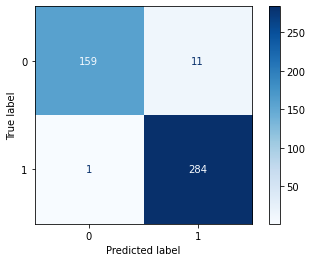

In [22]:
# Tree, Trainset
display_confusion_matrix(y_train, pred_train_tree, "DecsionTree-Trainset")

In [23]:
# Precision Recall curve
def display_pr_curve(y, pred_prob, title):
    """precision recall curve 시각화"""
    precision, recall, _ = precision_recall_curve(y, pred_prob)
    ap_score = average_precision_score(y, pred_prob)
    disp = PrecisionRecallDisplay(precision, recall, average_precision=ap_score)
    disp.plot()
    plt.title(title)
    plt.grid(True)

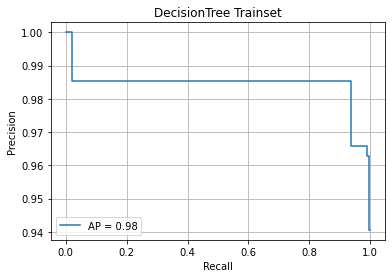

In [30]:
display_pr_curve(y_train, pred_train_prob_tree, "DecisionTree Trainset")

In [31]:
def display_roc_curve(y, pred_prob, title):
    fpr, tpr, _ = roc_curve(y, pred_prob)
    auc_score = roc_auc_score(y, pred_prob)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
    disp.plot()
    plt.title(title)

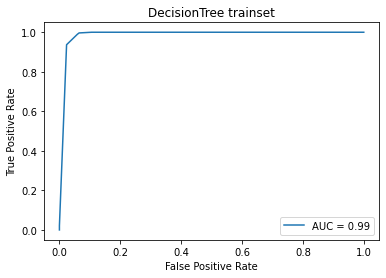

In [32]:
display_roc_curve(y_train, pred_train_prob_tree, "DecisionTree trainset")